<a href="https://colab.research.google.com/github/shelke16/DL/blob/main/HousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Boston (1).csv to Boston (1) (1).csv


In [ ]:
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)


In [ ]:
df = df.drop(columns=["Unnamed: 0"], errors='ignore')

In [ ]:
X = df.drop(columns=["medv"])
y = df["medv"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Model Performance Metrics:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")

Model Performance Metrics:
Mean Absolute Error: 2.04
Mean Squared Error: 7.91
Root Mean Squared Error: 2.81
R-squared Score: 0.8921


In [ ]:
# Predict house price for user input
def predict_price():
    print("\nEnter house features:")
    input_data = []
    for feature in X.columns:
        value = float(input(f"Enter value for {feature}: "))
        input_data.append(value)
    input_array = np.array(input_data).reshape(1, -1)
    input_scaled = scaler.transform(input_array)
    predicted_price = model.predict(input_scaled)
    print(f"Predicted house price: ${predicted_price[0]:.2f}")

In [ ]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(X)
final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_model.fit(X_scaled, y)

RandomForestRegressor(random_state=42)

In [ ]:
print("\nFinal model trained on full dataset and ready for deployment.")



Final model trained on full dataset and ready for deployment.


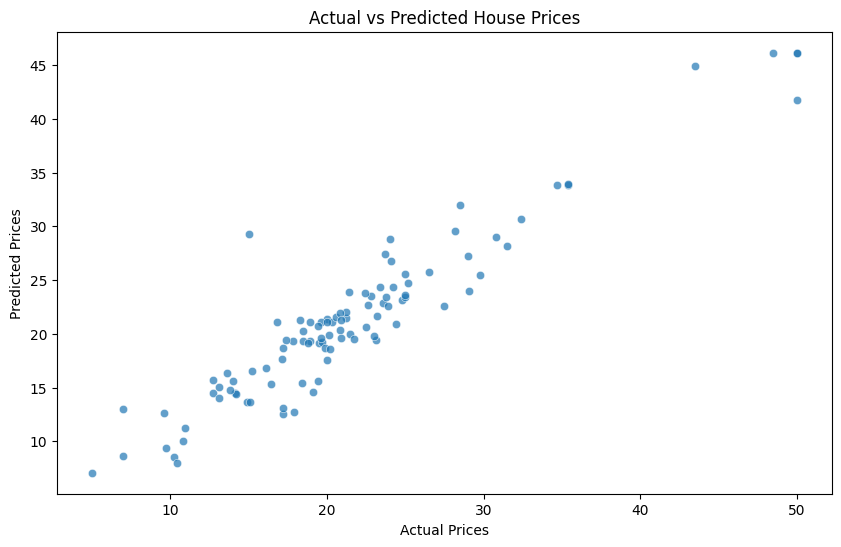

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()